🔍 **Introducción a TensorFlow: Construyendo Modelos Robustos con Herramientas Modernas**  
*Un viaje por los fundamentos del deep learning y las mejores prácticas para entrenar redes neuronales eficientes*  

¡Bienvenido/a a este notebook! 🌟 En esta guía, exploraremos **TensorFlow**, una de las bibliotecas más poderosas y versátiles para el desarrollo de modelos de *machine learning* y *deep learning*. Desarrollada por Google, TensorFlow permite crear, entrenar y desplegar redes neuronales de manera eficiente, escalando desde prototipos simples hasta sistemas de producción complejos.  

### 🎯 **Objetivos del Notebook**  
- **Introducir TensorFlow y su ecosistema**: Desde tensores hasta grafos de cómputo.  
- **Dominar la API Sequential**: Para construir modelos capa por capa de forma intuitiva.  
- **Optimizadores y funciones de pérdida**: Entender cómo "aprende" una red neuronal.  
- **Regularización**: Técnicas clave para evitar el sobreajuste (*overfitting*).  
- **Flujo de trabajo integral**: Desde el preprocesamiento de datos hasta la evaluación del modelo.  

---

### 🧠 **¿Por qué TensorFlow?**  
TensorFlow es la columna vertebral de aplicaciones modernas en áreas como:  
- **Visión por computadora** (clasificación de imágenes, detección de objetos).  
- **Procesamiento de lenguaje natural** (traducción automática, chatbots).  
- **Sistemas de recomendación**.  
Su flexibilidad, integración con *hardware* acelerado (GPUs/TPUs) y soporte para cómputo distribuido lo hacen indispensable en la industria e investigación.  

---

### 🔧 **Componentes Clave que Abordaremos**  
1. **API Sequential**:  
   - Creación de modelos *feedforward* con capas predefinidas (`Dense`, `Conv2D`, `LSTM`).  
   - Ejemplo rápido:  
   ```python
   model = tf.keras.Sequential([
       tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
       tf.keras.layers.Dropout(0.2),  # ¡Regularización desde el inicio!
       tf.keras.layers.Dense(10, activation='softmax')
   ])
   ```

2. **Optimizadores**:  
   - Algoritmos como `SGD`, `Adam`, `RMSprop` que ajustan los pesos del modelo para minimizar la pérdida.  
   - Parámetros clave: `learning_rate`, `momentum`.  

3. **Funciones de Pérdida**:  
   - Elección según la tarea: `MSE` (regresión), `Crossentropy` (clasificación), o personalizadas.  
   - Importancia de la diferenciabilidad en el descenso de gradiente.  

4. **Regularización**:  
   - **L1/L2**: Penalización de pesos grandes durante el entrenamiento.  
   - **Dropout**: "Apaga" neuronas aleatoriamente para evitar dependencias espurias.  
   - **Early Stopping**: Detener el entrenamiento cuando la pérdida en validación deja de mejorar.  

---

### 🛡️ **Lucha Contra el Overfitting: Técnicas Esenciales**  
La regularización no es opcional; es un seguro para garantizar que tu modelo generalice bien. Analizaremos:  
- Cómo aplicar `kernel_regularizer` en capas de TensorFlow.  
- El balance entre sesgo y varianza.  
- Métricas de evaluación (`accuracy`, `precision`, `recall`) para detectar problemas temprano.  

---

### 🚀 **¿Qué Veremos Próximamente?**  
- Preprocesamiento de datos con `tf.data`.  
- Uso de *callbacks* para guardar modelos o ajustar la tasa de aprendizaje.  
- Ejemplos prácticos con conjuntos de datos como MNIST o CIFAR-10.  

¡Prepárate para sumergirte en el mundo del deep learning con herramientas profesionales! 🌐 Al final de este notebook, tendrás las bases para diseñar, entrenar y ajustar modelos robustos con TensorFlow.  

```python
# ¡Manos a la obra! 
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
```  

📌 **Nota**: Este notebook asume conocimientos básicos de Python y conceptos de machine learning. ¡Vamos a codificar! 🚀

In [32]:
import tensorflow as tf
from tensorflow import keras

#Visualización
import matplotlib.pyplot as plt
import datetime

%load_ext tensorboard



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
! rm -rf ./logs/

In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

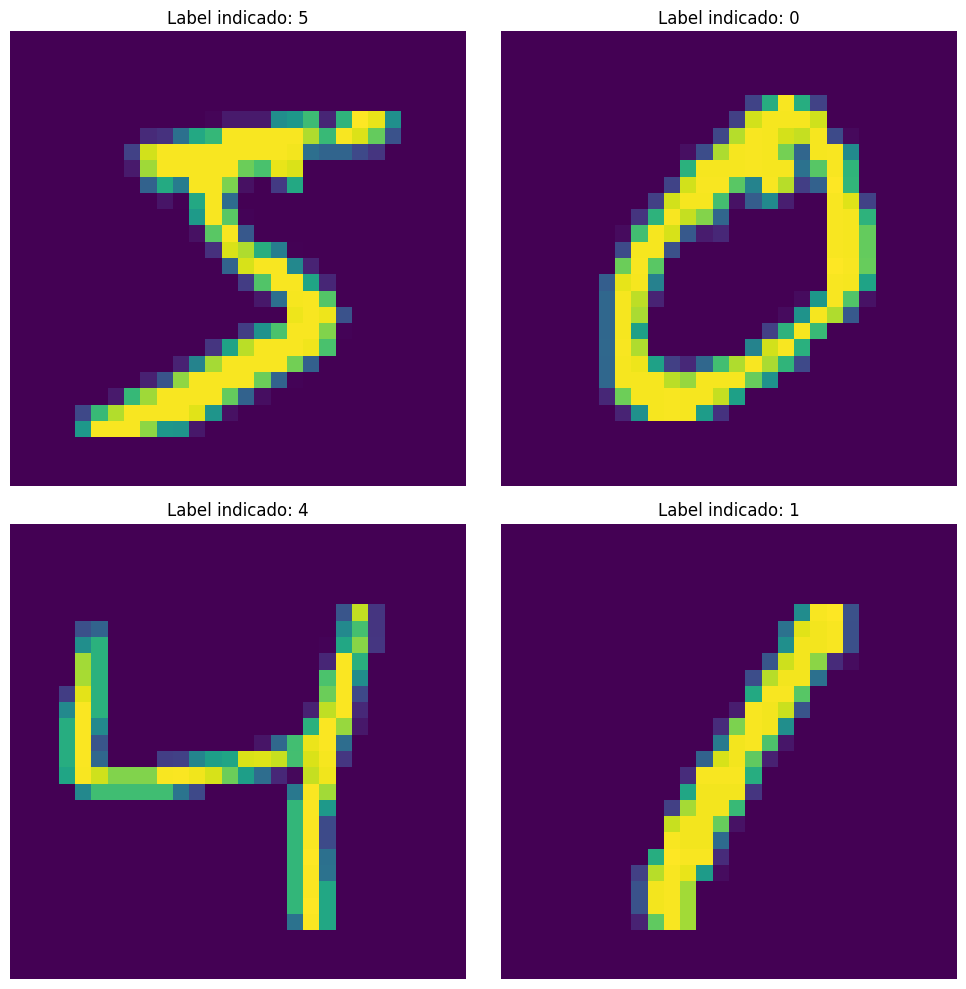

In [9]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f'Label indicado: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()

In [44]:
simple_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/home/robert/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
simple_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compile the simple_model
simple_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the simple_model
history = simple_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

# Evaluate the simple_model
test_loss, test_accuracy = simple_model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.3f}")

Epoch 1/5
1500/1500 - 9s - 6ms/step - accuracy: 0.9215 - loss: 0.2702 - val_accuracy: 0.9636 - val_loss: 0.1296
Epoch 2/5
1500/1500 - 7s - 4ms/step - accuracy: 0.9663 - loss: 0.1108 - val_accuracy: 0.9686 - val_loss: 0.1065
Epoch 3/5
1500/1500 - 6s - 4ms/step - accuracy: 0.9762 - loss: 0.0766 - val_accuracy: 0.9687 - val_loss: 0.1100
Epoch 4/5
1500/1500 - 7s - 4ms/step - accuracy: 0.9824 - loss: 0.0565 - val_accuracy: 0.9652 - val_loss: 0.1135
Epoch 5/5
1500/1500 - 7s - 4ms/step - accuracy: 0.9850 - loss: 0.0445 - val_accuracy: 0.9763 - val_loss: 0.0846
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0929

Test accuracy: 0.975


In [47]:
import pandas as pd
history_df= pd.DataFrame(history.history)

In [48]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.921500,0.270207,0.963583,0.129597
1,0.966292,0.110796,0.968583,0.106460
2,0.976208,0.076617,0.968667,0.110040
3,0.982417,0.056497,0.965167,0.113483
4,0.985021,0.044465,0.976333,0.084646


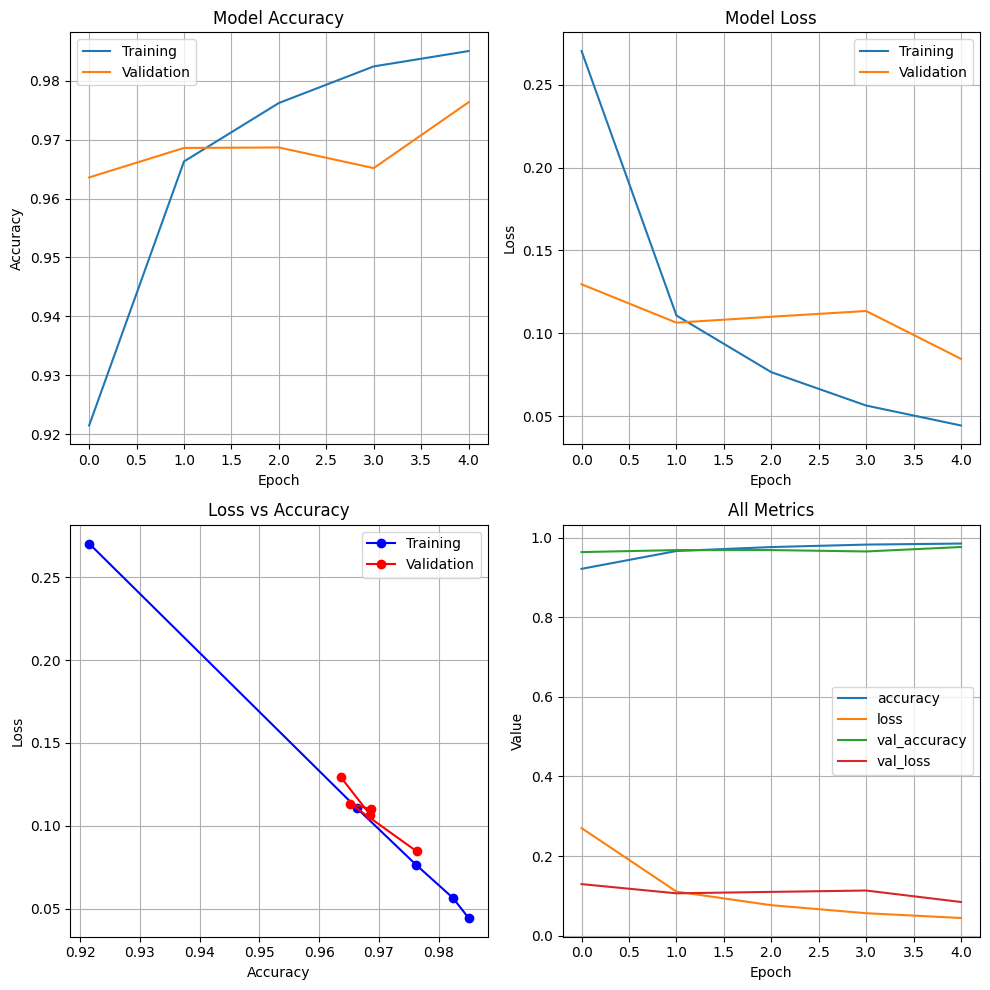

In [49]:
# Plot training history
plt.figure(figsize=(10, 10))

# Create 4 subplots
plt.subplot(2, 2, 1)
plt.plot(history_df['accuracy'], label='Training')
plt.plot(history_df['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(history_df['loss'], label='Training')
plt.plot(history_df['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(history_df['accuracy'], history_df['loss'], 'bo-', label='Training')
plt.plot(history_df['val_accuracy'], history_df['val_loss'], 'ro-', label='Validation')
plt.title('Loss vs Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
metrics = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
for metric in metrics:
    plt.plot(history_df[metric], label=metric)
plt.title('All Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Customized Model with Dropout and Initialization



In [50]:

# Create a Sequential model for MNIST
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),  # Flatten 28x28 images
    keras.layers.Dense(128, activation='relu',
                      kernel_initializer='glorot_normal',
                      bias_initializer='zeros',
                      name='Primera_capa_densa'),  # First dense layer
    keras.layers.Dropout(0.2, name='dropout_1'),
    keras.layers.Dense(64, activation='relu',
                      kernel_initializer='glorot_normal', 
                      bias_initializer='zeros',
                      name='dense_2'),
    keras.layers.Dropout(0.2, name='dropout_2'),
    keras.layers.Dense(10, activation='softmax',
                      kernel_initializer='glorot_normal',
                      bias_initializer='zeros',
                      name='output')  # 10 classes (digits 0-9)
])

/home/robert/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_input (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Primera_capa_densa (Dense)      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

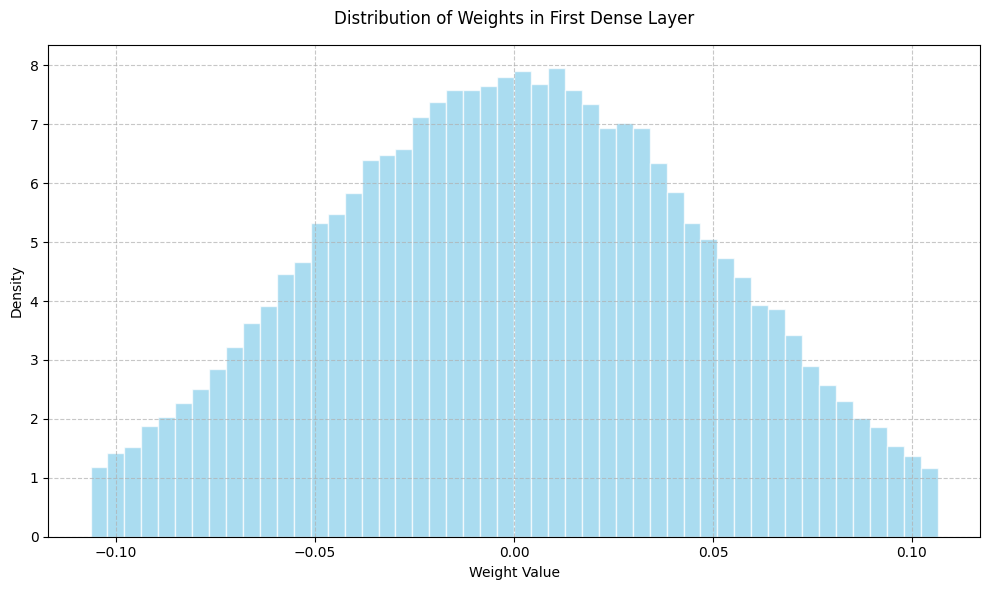

In [23]:
# Get the first layer's weights and convert to numpy array
first_layer_weights = model.weights[0].numpy()

# Create a histogram/distribution plot of the weights
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(first_layer_weights.flatten(), bins=50, density=True, 
         color='skyblue', edgecolor='white', alpha=0.7)
plt.title('Distribution of Weights in First Dense Layer', 
          fontsize=12, pad=15)
plt.xlabel('Weight Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [65]:
from callbacks_SIMG import TrainingProgressCallback



# Compile the model with configurable parameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.02),  # Increased learning rate
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
    ]
)



# Train the model with configurable parameters
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,  # Increased batch size for faster training
    validation_split=0.2,
    callbacks=[
        TrainingProgressCallback(),
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,  # Reduced patience for earlier stopping
            restore_best_weights=True
        )
    ],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.3f}")


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.2216 - val_sparse_categorical_accuracy: 0.9543
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - loss: 0.2611 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.2364 - val_sparse_categorical_accuracy: 0.9496

Training completed!
Final training loss: 0.2819
Final training accuracy: 0.9343
Final validation loss: 0.2364
Final validation accuracy: 0.9496
                _,.---.---.---.--.._ 
           _.-' `--.`---.`---'-. _,`--.._
          /`--._ .'.     `.     `,`-.`-._\
         ||   \  `.`---.__`__..-`. ,'`-._/
    _  ,`\ `-._\   \    `.    `_.-`-._,``-.
 ,`   `-_ \/ `-.`--.\    _\_.-'\__.-`-.`-._`.
(_.o> ,--. `._/'--.-`,--`  \_.-'       \`-._ \
 `---'    `._ `---._/__,----`           `-. `-\
           /_, ,  _..-'                    `-._\
           \_, \/ ._(
            \_, \/ ._\
             `._,\/ ._\
               `._// ./`-._
        LGB      `-._-

In [66]:
history= pd.DataFrame(history.history)

In [67]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.921500,0.270207,0.963583,0.129597
1,0.966292,0.110796,0.968583,0.106460
2,0.976208,0.076617,0.968667,0.110040
3,0.982417,0.056497,0.965167,0.113483
4,0.985021,0.044465,0.976333,0.084646


# Monitoring

In [69]:
import datetime
import tensorflow as tf
from tensorflow import keras

# Create logs directory for TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_images=True
)

# Create a CNN model
cnn_model = keras.Sequential([
    # First convolutional layer - specify correct input shape
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
# Compile the model
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Reshape the input data for CNN
x_train_reshaped = x_train.reshape((-1, 28, 28, 1))
x_test_reshaped = x_test.reshape((-1, 28, 28, 1))

# Train the CNN model with TensorBoard monitoring
cnn_history = cnn_model.fit(
    x_train_reshaped, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tensorboard_callback,
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ],
    verbose=1
)

# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_reshaped, y_test, verbose=1)
print(f"\nCNN Test accuracy: {cnn_test_accuracy:.3f}")

# Store training history in DataFrame
cnn_history_df = pd.DataFrame(cnn_history.history)
print("\nTraining History:")
print(cnn_history_df)

# Print instructions for viewing TensorBoard
print("\nTo view training progress in TensorBoard, run this command in terminal:")
print(f"tensorboard --logdir {log_dir}")


/home/robert/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.7741 - loss: 0.7112 - val_accuracy: 0.9740 - val_loss: 0.0867
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 210ms/step - accuracy: 0.9614 - loss: 0.1262 - val_accuracy: 0.9814 - val_loss: 0.0631
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 220ms/step - accuracy: 0.9726 - loss: 0.0929 - val_accuracy: 0.9848 - val_loss: 0.0509
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.9863 - val_loss: 0.0465
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 220ms/step - accuracy: 0.9842 - loss: 0.0546 - val_accuracy: 0.9871 - val_loss: 0.0441
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.9847 - loss: 0.0504 - val_accuracy: 0.9878 - val_loss: 0.0422
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 213ms/step - accuracy: 0.9859 - loss: 0.0437 - val_accuracy: 0.9891 - val_loss: 0.0407
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 212ms/step - accuracy: 0.9872 - loss: 0